In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
import numpy as np
import random
import matplotlib.pyplot as plt

In [19]:
path=r'C:\Users\User\Downloads'

In [20]:
X_train=np.loadtxt(path+'\input.csv', delimiter = ',')

In [21]:
X_train.shape

(2000, 30000)

In [22]:
y_train=np.loadtxt(path+'\labels.csv',delimiter=',')
X_test=np.loadtxt(path+'\input_test.csv',delimiter=',')
y_test=np.loadtxt(path+'\labels_test.csv',delimiter=',')

# Before re shape

In [23]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [24]:
X_train=X_train.reshape(len(X_train),100,100,3)
X_test=X_test.reshape(len(X_test),100,100,3)
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

In [25]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


# Before Normalization

In [26]:
X_train[0]

array([[[ 37.,  39.,  25.],
        [ 26.,  24.,   9.],
        [ 34.,  25.,  10.],
        ...,
        [ 57.,  44.,  35.],
        [ 61.,  47.,  38.],
        [ 65.,  51.,  42.]],

       [[ 45.,  43.,  28.],
        [ 28.,  25.,   8.],
        [ 52.,  40.,  24.],
        ...,
        [ 54.,  41.,  32.],
        [ 57.,  43.,  34.],
        [ 61.,  47.,  38.]],

       [[ 52.,  45.,  26.],
        [ 32.,  24.,   5.],
        [ 69.,  54.,  35.],
        ...,
        [ 54.,  40.,  29.],
        [ 56.,  42.,  31.],
        [ 59.,  45.,  34.]],

       ...,

       [[ 20.,  39.,   0.],
        [101., 125.,  67.],
        [152., 182., 120.],
        ...,
        [ 46.,  41.,  19.],
        [ 60.,  55.,  33.],
        [ 60.,  55.,  33.]],

       [[ 46.,  65.,   9.],
        [116., 140.,  82.],
        [156., 186., 124.],
        ...,
        [ 64.,  60.,  35.],
        [ 75.,  71.,  46.],
        [ 72.,  68.,  43.]],

       [[ 81., 100.,  44.],
        [126., 150.,  92.],
        [146., 1

In [27]:
X_train=X_train/255.0
X_test=X_test/255.0
# Here we did the normalization by dividing into 255 bcoz their is no image is greater than than 255

In [28]:
X_train[0]

array([[[0.14509804, 0.15294118, 0.09803922],
        [0.10196078, 0.09411765, 0.03529412],
        [0.13333333, 0.09803922, 0.03921569],
        ...,
        [0.22352941, 0.17254902, 0.1372549 ],
        [0.23921569, 0.18431373, 0.14901961],
        [0.25490196, 0.2       , 0.16470588]],

       [[0.17647059, 0.16862745, 0.10980392],
        [0.10980392, 0.09803922, 0.03137255],
        [0.20392157, 0.15686275, 0.09411765],
        ...,
        [0.21176471, 0.16078431, 0.1254902 ],
        [0.22352941, 0.16862745, 0.13333333],
        [0.23921569, 0.18431373, 0.14901961]],

       [[0.20392157, 0.17647059, 0.10196078],
        [0.1254902 , 0.09411765, 0.01960784],
        [0.27058824, 0.21176471, 0.1372549 ],
        ...,
        [0.21176471, 0.15686275, 0.11372549],
        [0.21960784, 0.16470588, 0.12156863],
        [0.23137255, 0.17647059, 0.13333333]],

       ...,

       [[0.07843137, 0.15294118, 0.        ],
        [0.39607843, 0.49019608, 0.2627451 ],
        [0.59607843, 0

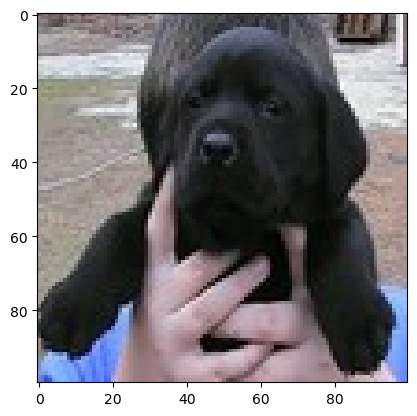

In [31]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [32]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = (100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,093,665 (4.17 MB)

 Trainable params: 1,093,665 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [35]:
model.fit(X_train,y_train,batch_size=64,epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.4915 - loss: 0.7800
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5644 - loss: 0.6823
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.6553 - loss: 0.6306
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7143 - loss: 0.5508
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8034 - loss: 0.4652
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8104 - loss: 0.4140
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8343 - loss: 0.3676
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8813 - loss: 0.2956
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9070 - loss: 0.2573
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9233 - loss: 0.2126


# Evalute the model

In [36]:
model.evaluate(X_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.6353 - loss: 0.8961


[0.720032274723053, 0.6899999976158142]

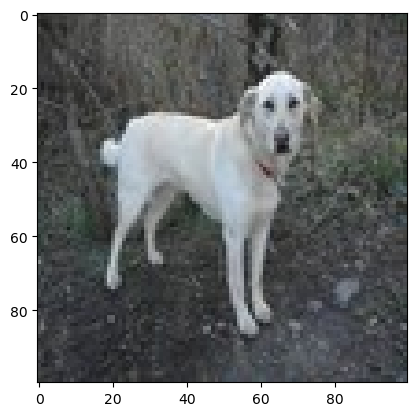

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Our model says it is a : dog


In [45]:
idx2 = random.randint(0, len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)